In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv("../data/melb_data.csv")
data.head()


Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

### Data preprocessing

In [41]:
# loop through each column in the dataset
for column in data.columns:
    # calculate the number of unique values in the column
    unique_values = data[column].nunique()
    # print the column name and number of unique values
    print(f"{column}: {unique_values}")


Suburb: 314
Address: 13378
Rooms: 9
Type: 3
Price: 2204
Method: 5
SellerG: 268
Date: 58
Distance: 202
Postcode: 198
Bedroom2: 12
Bathroom: 9
Car: 11
Landsize: 1448
BuildingArea: 602
YearBuilt: 144
CouncilArea: 33
Lattitude: 6503
Longtitude: 7063
Regionname: 8
Propertycount: 311


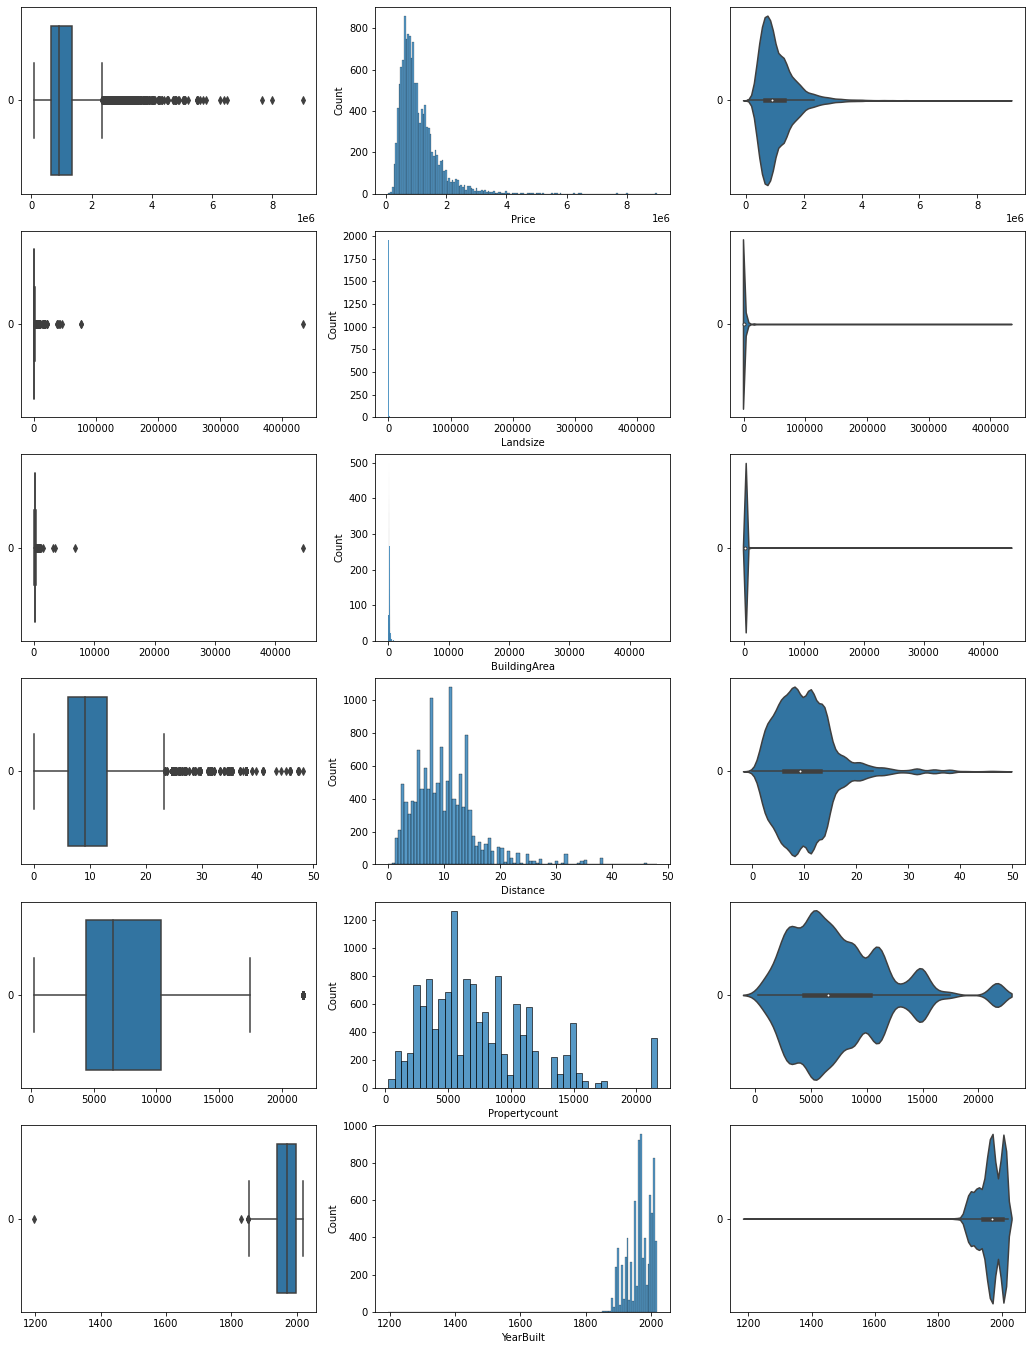

In [42]:
numeric_data = pd.DataFrame(data[["Price", "Landsize", "BuildingArea", "Distance", "Propertycount", "YearBuilt"]])
categorical_variable = pd.DataFrame(data.drop(["Price", "Landsize", "BuildingArea", "Distance", "Propertycount"], axis=1))

# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data=numeric_data[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=numeric_data[var], ax=axes[count, 1])
    sb.violinplot(data=numeric_data[var], orient="h", ax=axes[count, 2])
    count += 1


From the looks of histogram graph and violin plot, we need to clean the numeric data with z-score. Except for Property Count

In [43]:
numeric_data.drop(["Propertycount", "YearBuilt"], axis=1)
numeric_data.drop(numeric_data.columns[0], axis=1)


Landsize  BuildingArea  Distance  Propertycount  YearBuilt
0         202.0           NaN       2.5         4019.0        NaN
1         156.0          79.0       2.5         4019.0     1900.0
2         134.0         150.0       2.5         4019.0     1900.0
3          94.0           NaN       2.5         4019.0        NaN
4         120.0         142.0       2.5         4019.0     2014.0
...         ...           ...       ...            ...        ...
13575     652.0           NaN      16.7         7392.0     1981.0
13576     333.0         133.0       6.8         6380.0     1995.0
13577     436.0           NaN       6.8         6380.0     1997.0
13578     866.0         157.0       6.8         6380.0     1920.0
13579     362.0         112.0       6.3         6543.0     1920.0

[13580 rows x 5 columns]

In [44]:
for col in numeric_data:
   mean = data[col].mean()
   SD = data[col].std()
   outlierHead = mean - 3*SD
   outlierTail = mean + 3*SD
   data.drop(data[(data[col] < outlierHead) | (data[col] > outlierTail)].index, inplace=True)

num_plots = len(numeric_data.columns)
print(num_plots)

6


### Categorical

In [45]:
def countplot_helper(variable, data, width, height):
    # create a larger figure
    plt.figure(figsize=(width, height))

    # Create the scatter plot
    sb.catplot(y=variable, data=data, kind="count")

    # Add labels and a title
    plt.title('Boxplot of {} '.format(variable))

    # show the plot
    plt.show()


In [46]:
categorical_variable.drop(["Address", "Date", "Lattitude", "Longtitude"], axis=1)


Suburb  Rooms Type Method   SellerG  Postcode  Bedroom2  \
0         Abbotsford      2    h      S    Biggin    3067.0       2.0   
1         Abbotsford      2    h      S    Biggin    3067.0       2.0   
2         Abbotsford      3    h     SP    Biggin    3067.0       3.0   
3         Abbotsford      3    h     PI    Biggin    3067.0       3.0   
4         Abbotsford      4    h     VB    Nelson    3067.0       3.0   
...              ...    ...  ...    ...       ...       ...       ...   
13575  Wheelers Hill      4    h      S     Barry    3150.0       4.0   
13576   Williamstown      3    h     SP  Williams    3016.0       3.0   
13577   Williamstown      3    h      S     Raine    3016.0       3.0   
13578   Williamstown      4    h     PI   Sweeney    3016.0       4.0   
13579     Yarraville      4    h     SP   Village    3013.0       4.0   

       Bathroom  Car  YearBuilt CouncilArea                  Regionname  
0           1.0  1.0        NaN       Yarra       Northern Metropolitan  
1           1.0  0.0     1900.0       Yarra       Northern Metropolitan  
2           2.0  0.0     1900.0       Yarra       Northern Metropolitan  
3           2.0  1.0        NaN       Yarra       Northern Metropolitan  
4           1.0  2.0     2014.0       Yarra       Northern Metropolitan  
...         ...  ...        ...         ...                         ...  
13575       2.0  2.0     1981.0         NaN  South-Eastern Metropolitan  
13576       2.0  2.0     1995.0         NaN        Western Metropolitan  
13577       2.0  4.0     1997.0         NaN        Western Metropolitan  
13578       1.0  5.0     1920.0         NaN        Western Metropolitan  
13579       1.0  1.0     1920.0         NaN        Western Metropolitan  

[13580 rows x 12 columns]

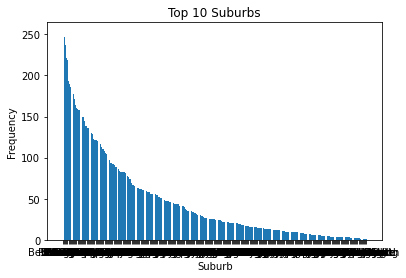

In [47]:
top_suburbs = data['Suburb'].value_counts()

# create a bar plot of the top 10 suburbs
plt.bar(x=top_suburbs.index, height=top_suburbs.values)
plt.title('Top 10 Suburbs')
plt.xlabel('Suburb')
plt.ylabel('Frequency')
plt.show()


<Figure size 720x720 with 0 Axes>

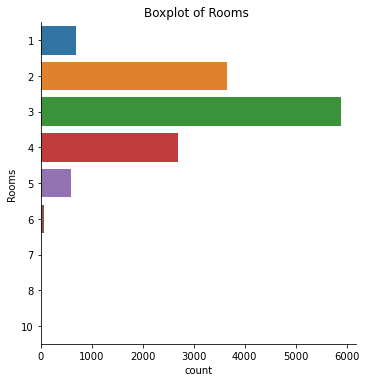

In [48]:
countplot_helper("Rooms", categorical_variable, 10, 10)


Numbers of cases with more than 6 rooms are too insignificant (with only less than 20 out of 13580 values) for the model to make prediction in that range. We may need to drop those cases to prevent them from biasing the prediction.

<Figure size 720x720 with 0 Axes>

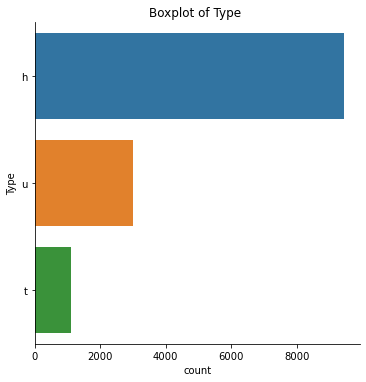

In [49]:
countplot_helper("Type", categorical_variable, 10, 10)


<Figure size 720x720 with 0 Axes>

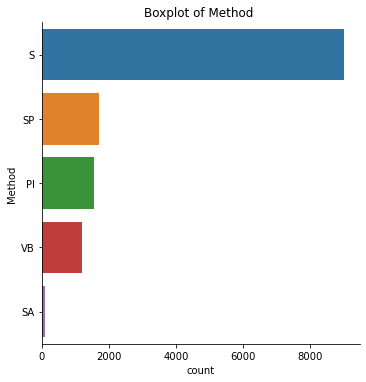

In [50]:
countplot_helper("Method", categorical_variable, 10, 10)


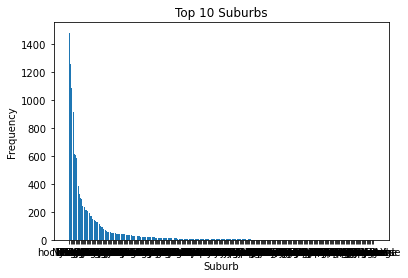

In [51]:
top_suburbs = data['SellerG'].value_counts()

# create a bar plot of the top 10 suburbs
plt.bar(x=top_suburbs.index, height=top_suburbs.values)
plt.title('Top 10 Suburbs')
plt.xlabel('Suburb')
plt.ylabel('Frequency')
plt.show()


<Figure size 720x720 with 0 Axes>

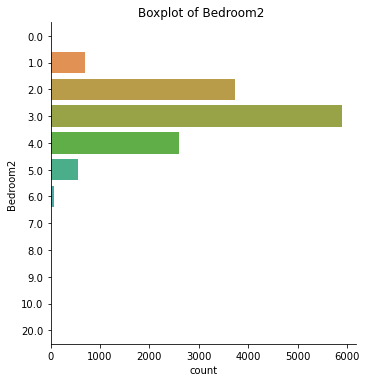

In [52]:
countplot_helper("Bedroom2", categorical_variable, 10, 10)


The number of cases with more than 6 bedrooms is insignificant as compared to the total number of cases, providing limited information for model learning. We may need to drop those cases to prevent them from biasing the prediction.

<Figure size 720x720 with 0 Axes>

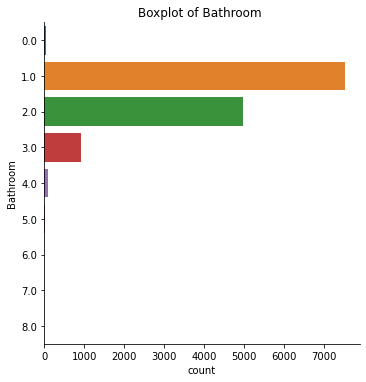

In [53]:
countplot_helper("Bathroom", categorical_variable, 10, 10)


The number of cases with more than 4 bathrooms is insignificant as compared to the total number of cases, providing limited information for model learning. We may need to drop those cases to prevent them from biasing the prediction.

<Figure size 720x720 with 0 Axes>

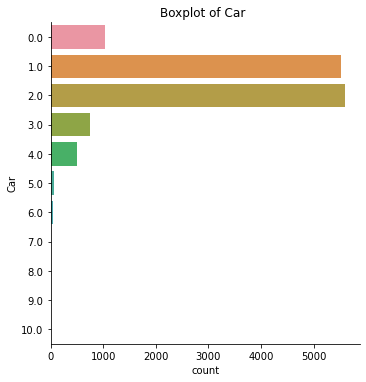

In [54]:
countplot_helper("Car", categorical_variable, 10, 10)


The number of cases with more than 5 carspots is insignificant as compared to the total number of cases, providing limited information for model learning. We may need to drop those cases to prevent them from biasing the prediction.

<Figure size 720x720 with 0 Axes>

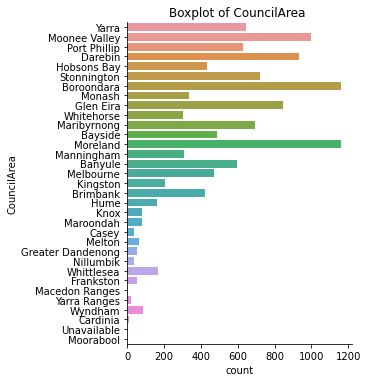

In [56]:
countplot_helper("CouncilArea", categorical_variable, 10, 10)


<Figure size 720x72 with 0 Axes>

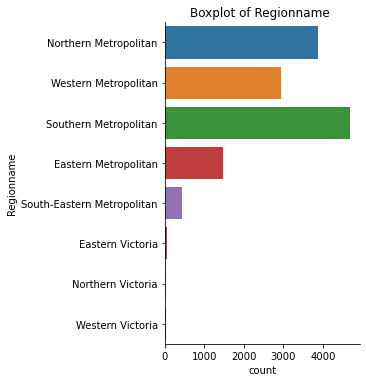

In [55]:

countplot_helper("Regionname", categorical_variable, 10, 1)


The number of cases in Eastern Victoria, Northen Victoria and Western Victorian is insignificant as compared to the total number of cases.

Exploratory Data Analysis

In [65]:
numeric = pd.DataFrame(
    data[["Price", "Landsize", "BuildingArea", "Distance", "Propertycount", "YearBuilt"]])


In [66]:
# Box-plot helper function, x is categorical, y is numeric variable
def scatterplot_helper(x, y, data, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))

    # Create the scatter plot
    sb.scatterplot(x=x, y=y, data=data)

    # Add labels and a title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Boxplot of {} by {}'.format(y, x))

    # show the plot
    plt.show()


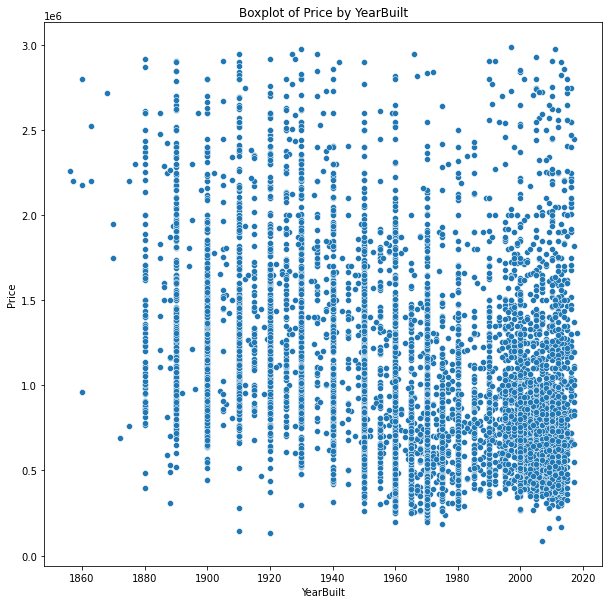

In [67]:
scatterplot_helper("YearBuilt", "Price", numeric, 10, 10)


There is a significant concentration of data points in the bottom-right region of the scatter plot, suggesting a positive correlation between price and building age.

Hence, building age should be a factor we should consider for our model.

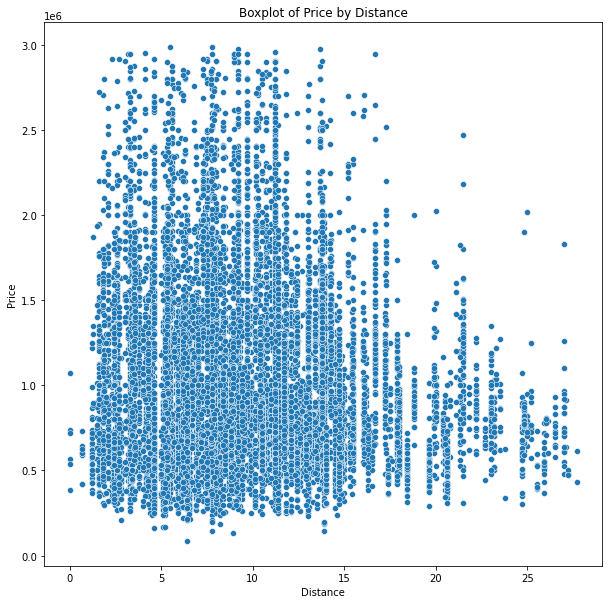

In [68]:
scatterplot_helper("Distance", "Price", numeric, 10, 10)


No significant correlation between price and distance from CBD can be observed from the scatter plot visually.

Hence, more in-depth analysis would be necessary to determine whether distance from CBD is a factor to be considered for our model.

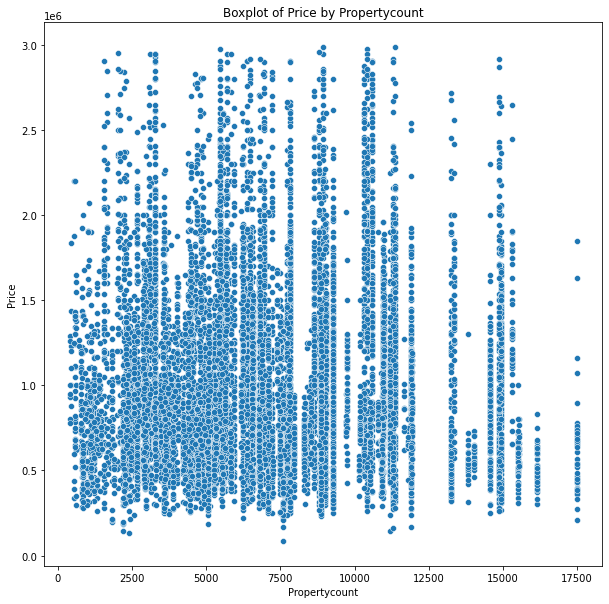

In [69]:
scatterplot_helper("Propertycount", "Price", numeric, 10, 10)


No significant correlation between price and number of properties in the respective suburb can be observed from the scatter plot visually.

Hence, more in-depth analysis would be necessary to determine whether number of properties in the respective suburb is a factor to be considered for our model.

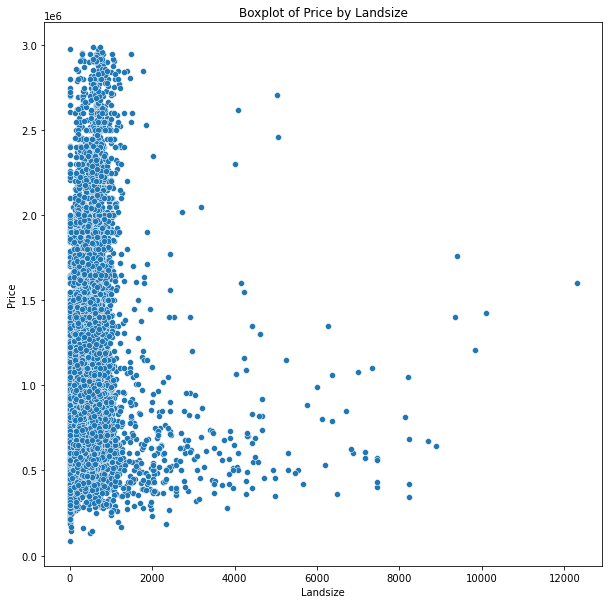

In [70]:
scatterplot_helper("Landsize", "Price", numeric, 10, 10)


No significant correlation between price and land size can be observed from the scatter plot visually.

Hence, more in-depth analysis would be necessary to determine whether land size is a factor to be considered for our model.

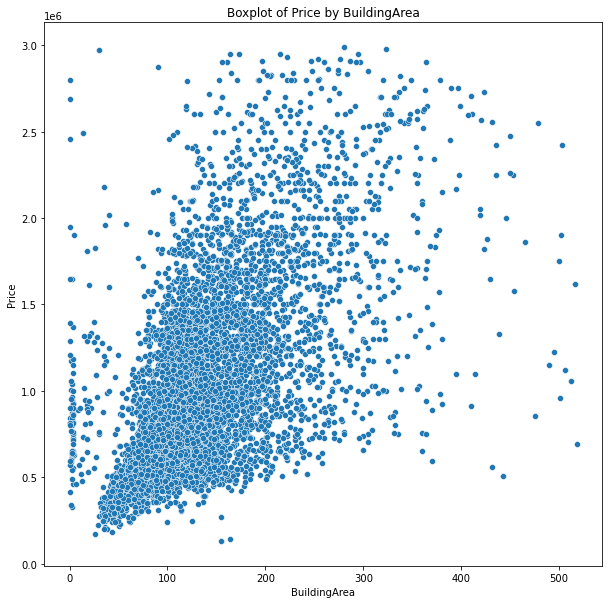

In [71]:
scatterplot_helper("BuildingArea", "Price", numeric, 10, 10)


There seems to be a positive correlation between price and building area.

Hence, building area is a factor we should consider for our model.

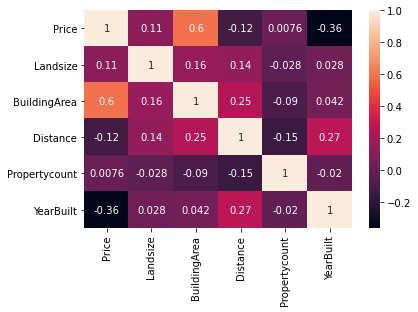

In [72]:
corr_matrix = numeric.corr()
sb.heatmap(corr_matrix, annot=True)
plt.show()


Building area seems to be the strongest factors affecting housing price.

In [81]:
# Box-plot helper function, x is categorical, y is numeric variable
def boxplot_helper(x, y, data, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))
    # create a boxplot of a categorical variable against a numeric variable
    sb.boxplot(x=x, y=y, data=data, palette='rainbow')
    # add a title to the plot
    plt.title('Boxplot of {} by {}'.format(y, x))
    # show the plot
    plt.show()


categorical = pd.DataFrame(data.drop(["Landsize", "BuildingArea", "Distance", "Propertycount", "Address", "Date", "Lattitude", "Longtitude"], axis=1))
categorical

Suburb  Rooms Type      Price Method   SellerG  Postcode  \
0         Abbotsford      2    h  1480000.0      S    Biggin    3067.0   
1         Abbotsford      2    h  1035000.0      S    Biggin    3067.0   
2         Abbotsford      3    h  1465000.0     SP    Biggin    3067.0   
3         Abbotsford      3    h   850000.0     PI    Biggin    3067.0   
4         Abbotsford      4    h  1600000.0     VB    Nelson    3067.0   
...              ...    ...  ...        ...    ...       ...       ...   
13575  Wheelers Hill      4    h  1245000.0      S     Barry    3150.0   
13576   Williamstown      3    h  1031000.0     SP  Williams    3016.0   
13577   Williamstown      3    h  1170000.0      S     Raine    3016.0   
13578   Williamstown      4    h  2500000.0     PI   Sweeney    3016.0   
13579     Yarraville      4    h  1285000.0     SP   Village    3013.0   

       Bedroom2  Bathroom  Car  YearBuilt CouncilArea  \
0           2.0       1.0  1.0        NaN       Yarra   
1           2.0       1.0  0.0     1900.0       Yarra   
2           3.0       2.0  0.0     1900.0       Yarra   
3           3.0       2.0  1.0        NaN       Yarra   
4           3.0       1.0  2.0     2014.0       Yarra   
...         ...       ...  ...        ...         ...   
13575       4.0       2.0  2.0     1981.0         NaN   
13576       3.0       2.0  2.0     1995.0         NaN   
13577       3.0       2.0  4.0     1997.0         NaN   
13578       4.0       1.0  5.0     1920.0         NaN   
13579       4.0       1.0  1.0     1920.0         NaN   

                       Regionname  
0           Northern Metropolitan  
1           Northern Metropolitan  
2           Northern Metropolitan  
3           Northern Metropolitan  
4           Northern Metropolitan  
...                           ...  
13575  South-Eastern Metropolitan  
13576        Western Metropolitan  
13577        Western Metropolitan  
13578        Western Metropolitan  
13579        Western Metropolitan  

[12675 rows x 13 columns]

In [82]:
boxplot_helper("Suburb", "Price", categorical, 500, 200)

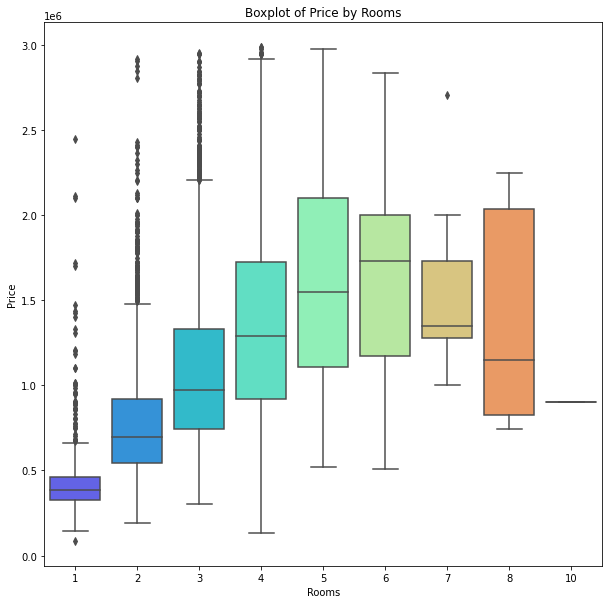

In [83]:
boxplot_helper("Rooms", "Price", categorical, 10, 10)


There seems to be a positive correlation between price and room number with the exception for room number 7 onwards, possibly due to the limited number of cases.

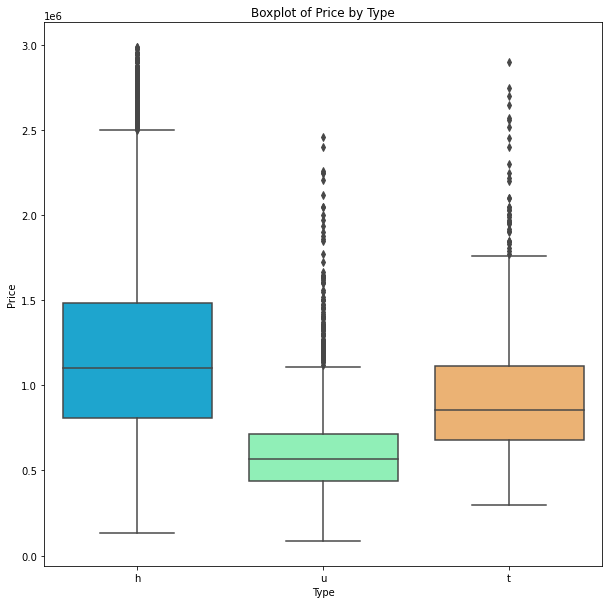

In [84]:
boxplot_helper("Type", "Price", categorical, 10, 10)


Type h housing seems to have the highest price in general, followed by type t. The lowest is type u.

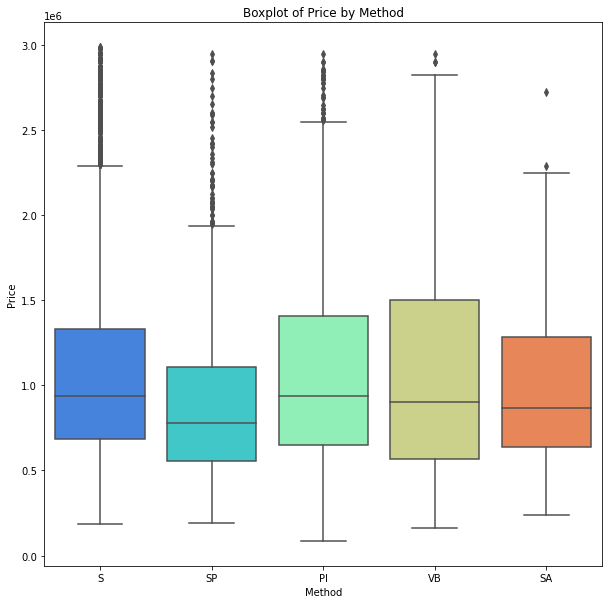

In [87]:
boxplot_helper("Method", "Price", categorical, 10, 10)


There is no significant correlation between price and method of transaction.

In [85]:
boxplot_helper("SellerG", "Price", categorical, 500, 200)


In [88]:
boxplot_helper("Postcode", "Price", categorical, 500, 200)


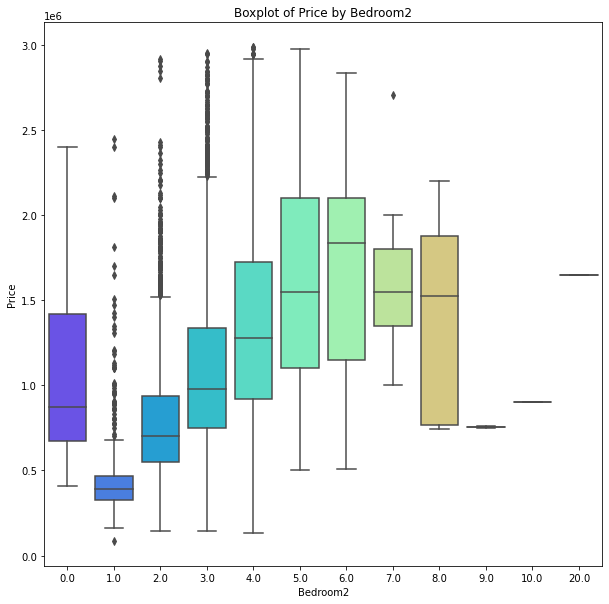

In [90]:
boxplot_helper("Bedroom2", "Price", categorical, 10, 10)


There seems to be a positive correlation between price and number of bedrooms with the exception for categories with 0 and more than 6 bedrooms, possibly due to the limited number of cases.

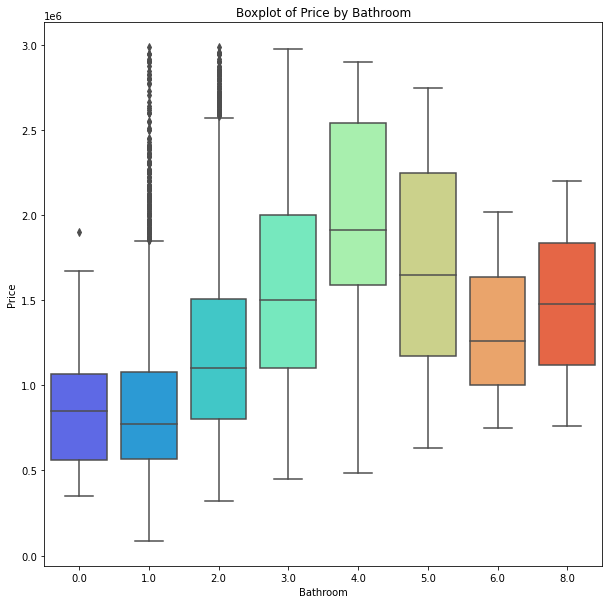

In [91]:
boxplot_helper("Bathroom", "Price", categorical, 10, 10)


There seems to be a positive correlation between price and number of bedrooms with the exception for categories with more than 4 bedrooms, possibly due to the limited number of cases.

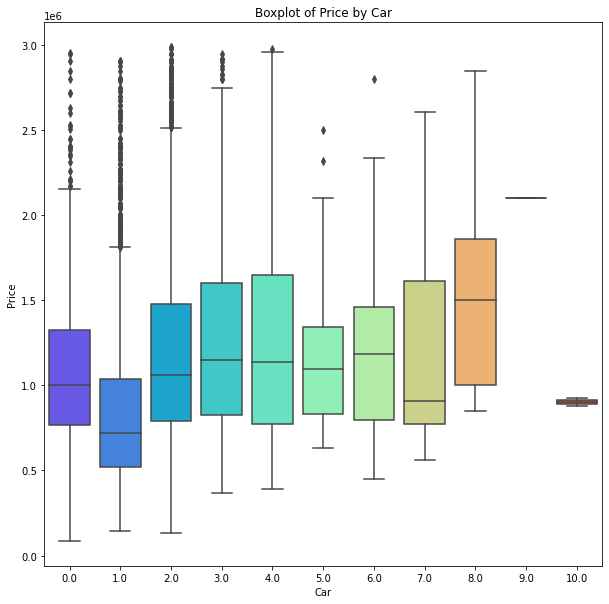

In [92]:
boxplot_helper("Car", "Price", categorical, 10, 10)


There seems to be a positive correlation between price and number of carspots, though not strong.

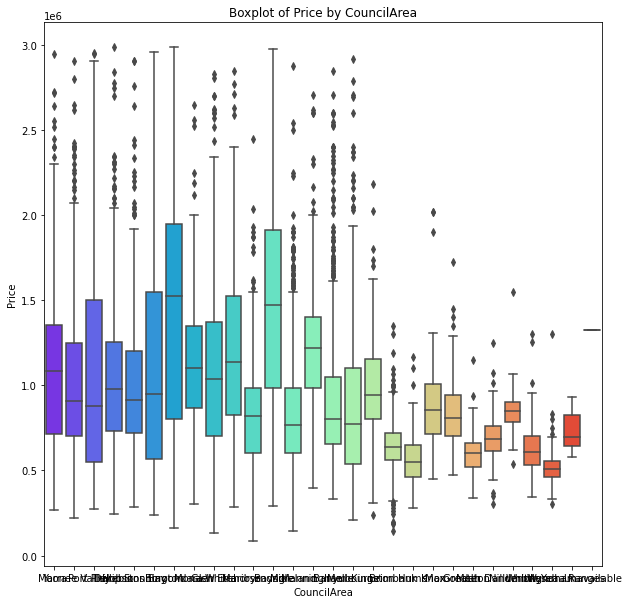

In [93]:
boxplot_helper("CouncilArea", "Price", categorical, 10, 10)


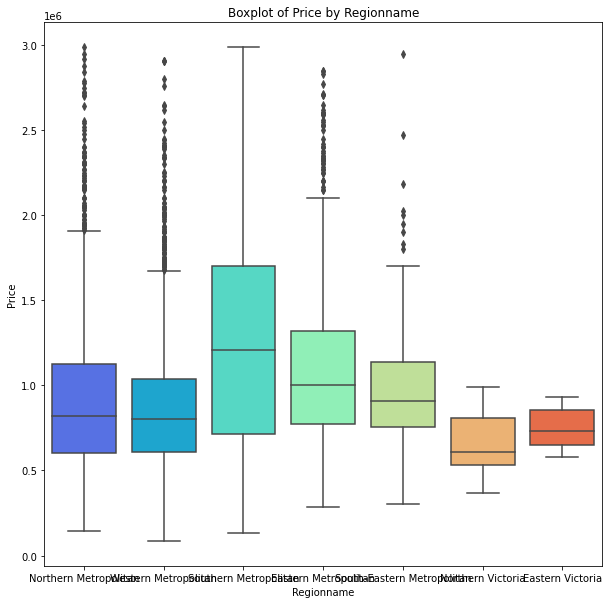

In [94]:
boxplot_helper("Regionname", "Price", categorical, 10, 10)
